# Fast Fourier Transform operation with pyclesperanto

This notebook display the usage of `fft` and `ifft` in pyclesperanto. As it is still a WIP, functions, parameters and usage may still change.

In [1]:
import pyclesperanto as cle
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.230.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Applying FFT and iFFT to an array

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]],
      dtype=float32, mtype=buffer)
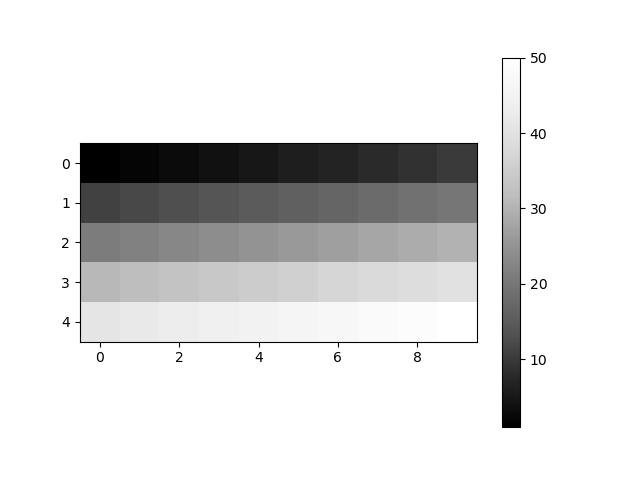
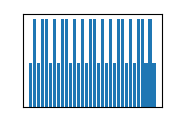

In [2]:
arr = cle.push(np.asarray( 
    [
        [
            [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30],
            [31,32,33,34,35,36,37,38,39,40],
            [41,42,43,44,45,46,47,48,49,50]
        ],
        [
            [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30],
            [31,32,33,34,35,36,37,38,39,40],
            [41,42,43,44,45,46,47,48,49,50]
        ]
    ]
).astype(np.float32))
arr

we call the `fft` operation which take a real array as input and will return the fft output as an Hermitian Complex buffer.

In [ ]:
cle.fft?

Object `cle.__experimental__.fft` not found.


In [ ]:
fft_arr = cle.fft(arr, None)
fft_arr

AttributeError: module 'pyclesperanto.__experimental__' has no attribute 'fft'

We can transform back the complexe buffer into a real array using the `ifft` function. Here, because we do not have the precise dimension of the real buffer output, an empty output buffer must be provided to the function. In this example, it is the same size buffer provided to the `fft` at the start of this notebook.

array([[[ 1.       ,  1.9999996,  3.0000002,  4.       ,  5.       ,
          6.       ,  7.       ,  8.       ,  9.       , 10.       ],
        [10.999999 , 11.999999 , 12.999999 , 13.999999 , 14.999999 ,
         15.999999 , 16.999998 , 17.999998 , 18.999998 , 19.999998 ],
        [21.       , 22.       , 23.       , 24.       , 25.       ,
         26.       , 27.       , 28.       , 29.       , 30.       ],
        [31.       , 32.       , 33.       , 34.       , 35.       ,
         36.       , 37.       , 38.       , 39.       , 40.       ],
        [41.       , 42.       , 43.       , 44.       , 45.       ,
         46.       , 47.       , 48.       , 49.       , 50.       ]],

       [[ 1.       ,  1.9999996,  3.0000002,  4.       ,  5.       ,
          6.       ,  7.       ,  8.       ,  9.       , 10.       ],
        [10.999999 , 11.999999 , 12.999999 , 13.999999 , 14.999999 ,
         15.999999 , 16.999998 , 17.999998 , 18.999998 , 19.999998 ],
        [21.       , 22.       , 23.       , 24.       , 25.       ,
         26.       , 27.       , 28.       , 29.       , 30.       ],
        [31.       , 32.       , 33.       , 34.       , 35.       ,
         36.       , 37.       , 38.       , 39.       , 40.       ],
        [41.       , 42.       , 43.       , 44.       , 45.       ,
         46.       , 47.       , 48.       , 49.       , 50.       ]]],
      dtype=float32, mtype=buffer)
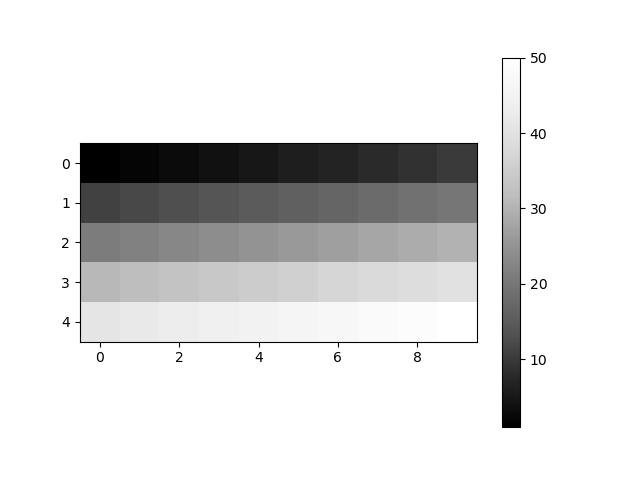
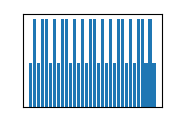

In [ ]:
new_arr = cle.create_like(arr)
cle.ifft(fft_arr, new_arr)
new_arr

We manage to retrieve the original array, with some approximation errors, possibly due to `single precision` approximation. 

Applying the same operation using numpy for verification with single and double precision. We can see with sinple precision that we also have some approximation (although less) which disapear using double precision.

In [ ]:
np.fft.ifft2(np.fft.fft2(arr)).real  # single precision

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]],
      dtype=float32)

In [ ]:
np.fft.ifft2(np.fft.fft2(arr.get().astype(float))).real  # double precision

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]])

## FFT on an image

array([[ 40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,  32.,  24.,
         24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152., 184., 208.,
        232., 232., 224.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160., 192., 216.,
        232., 232., 232.],
       [ 64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168., 200., 216.,
        224., 232., 232.],
       [ 40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,  24.,  24.,
         24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184., 208., 216.,
        224., 224., 224.],
       [ 16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  24.,  40.,  48.,  80., 112., 144., 176., 200., 216., 216.,
        216., 216., 216.],
       [ 24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  32.,  56.,  80., 112., 144., 176., 200., 208., 216., 216.,
        216., 216., 208.],
       [ 32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,  16.,  16.,
         32.,  40.,  80., 112., 144., 176., 200., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,  24.,  24.,
         48.,  64., 104., 144., 168., 192., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,  24.,  32.,
         64.,  88., 136., 176., 192., 200., 208., 216., 216., 208., 208.,
        200., 200., 192.],
       [ 48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,  40.,  48.,
         80., 112., 152., 184., 192., 200., 208., 216., 216., 216., 208.,
        208., 200., 200.],
       [ 48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  48.,  64.,
        104., 136., 160., 184., 192., 200., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,  64.,  88.,
        112., 144., 160., 176., 192., 200., 208., 216., 224., 224., 216.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  80., 104.,
        128., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  96., 120.,
        136., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72., 104., 128.,
        136., 144., 152., 160., 176., 192., 208., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 48.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,  96., 120.,
        136., 152., 168., 176., 192., 208., 216., 224., 224., 216., 216.,
        208., 200., 192.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  88., 112.,
        136., 152., 176., 192., 208., 216., 224., 224., 224., 216., 208.,
        200., 192., 184.],
       [ 80.,  56.,  40.,  32.,  24.,  32.,  32.,  48.,  64.,  88., 112.,
        144., 168., 184., 208., 216., 224., 232., 232., 224., 216., 208.,
        200., 192., 176.],
       [ 96.,  72.,  48.,  40.,  24.,  24.,  24.,  40.,  56.,  88., 112.,
        144., 176., 200., 216., 224., 232., 232., 232., 224., 216., 208.,
        192., 184., 168.],
       [120.,  96.,  64.,  48.,  32.,  32.,  24.,  48.,  64.,  96., 120.,
        152., 184., 208., 224., 232., 232., 232., 232., 224., 216., 208.,
        192., 176., 160.],
       [136., 112.,  80.,  56.,  32.,  32.,  24.,  48.,  64.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 152.],
       [152., 128.,  96.,  72.,  48.,  40.,  24.,  40.,  56.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 144.],
       [160., 136., 112.,  88.,  56.,  40.,  24.,  40.,  48.,  88., 120.,
        160., 192., 208., 216., 224., 232., 232., 232., 224., 216., 200.,
  
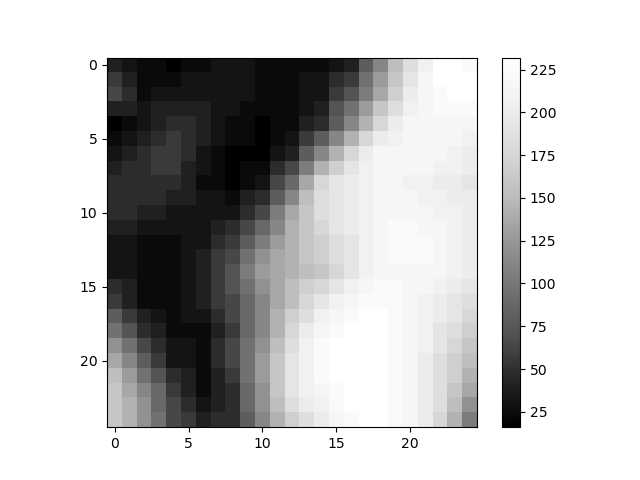
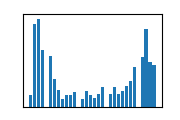

In [ ]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:25])
image

array([[ 7.60480000e+04,  0.00000000e+00, -1.29348706e+03,
         2.93375352e+04, -8.78221313e+02,  5.14521289e+03,
        -1.93794055e+03,  3.02302734e+03, -1.23869116e+03,
         2.56508154e+03, -1.31883289e+03,  1.88128394e+03,
        -1.32391479e+03,  1.25985229e+03, -1.25388452e+03,
         1.03588013e+03, -1.31072974e+03,  7.99563232e+02,
        -1.39977576e+03,  4.81325226e+02, -1.26516711e+03,
         4.26673889e+02, -1.19580322e+03,  1.72609268e+02,
        -1.60755225e+03, -2.60290192e+02],
       [-3.05712988e+03,  6.94592920e+03,  3.77175952e+03,
        -6.64639746e+03,  1.03140747e+03,  2.69614111e+03,
         1.69738867e+03, -1.07301651e+02,  1.10272949e+03,
         8.70532990e+01,  1.04500854e+03,  1.59591675e+02,
         8.71522949e+02,  2.70214355e+02,  6.61044495e+02,
         2.26386353e+02,  5.83132080e+02,  4.37123901e+02,
         5.01329010e+02,  3.12424988e+02,  4.55927155e+02,
         5.31809692e+02,  5.11664246e+02,  5.35057861e+02,
         2.60004272e+02,  4.17825165e+02],
       [-1.56302991e+03,  4.55707129e+03,  1.35451309e+02,
        -3.41037842e+03,  2.69961987e+03,  3.71999976e+03,
         7.17761719e+02, -1.40166779e+01,  8.69444702e+02,
         5.29452393e+02,  4.77380066e+02,  2.19403915e+02,
         3.09488831e+02,  3.51132111e+02,  2.26143951e+02,
         4.16414093e+02,  2.19709274e+02,  3.79616699e+02,
         8.79397736e+01,  3.77512848e+02,  3.15426483e+01,
         4.27432312e+02, -4.50566902e+01,  5.05402344e+02,
        -5.54544983e+01,  2.93685669e+02],
       [-1.14972498e+03,  2.04195776e+03,  1.85234955e+02,
        -8.61049561e+02,  1.37481445e+03, -2.58160858e+02,
         5.97814331e+02,  6.78405273e+02,  1.78653198e+02,
        -2.55641876e+02,  2.16624268e+02,  1.70866379e+02,
         1.85815918e+02,  1.13687019e+01,  1.48117645e+02,
         1.67285065e+02,  1.13643402e+02,  1.70141846e+02,
         9.18584900e+01,  9.32530518e+01, -2.58205509e+01,
         9.85843277e+01,  9.34255981e+00,  1.68324585e+02,
         2.31110458e+01,  1.23628807e+02],
       [-9.77455139e+02,  1.34035999e+03,  1.13328247e+02,
        -7.84057495e+02,  5.38099915e+02,  4.55152710e+02,
         3.84958069e+02,  1.01717346e+02, -6.65839233e+01,
         1.31869308e+02,  1.44588043e+02,  9.31907349e+01,
        -4.56587982e+00,  5.14784698e+01,  9.00593491e+01,
         8.67026062e+01, -4.04692764e+01,  1.27811386e+02,
        -1.29219780e+01,  1.34333115e+02, -4.28319321e+01,
         1.31047485e+02, -6.12455025e+01,  1.23285156e+02,
        -7.17077026e+01,  5.93334808e+01],
       [-1.02144275e+03,  9.78684265e+02,  4.62332581e+02,
        -8.37723694e+02,  2.11490540e+02,  6.12128540e+02,
         2.86722229e+02,  2.37071136e+02,  1.77433365e+02,
         1.44446854e+02,  2.16656189e+01,  1.68758026e+02,
         1.94863815e+01,  7.28306046e+01, -5.18627892e+01,
         7.55868759e+01, -4.47855721e+01,  1.49851425e+02,
        -4.03393021e+01,  7.92736664e+01, -3.83343887e+01,
         1.08576492e+02, -7.62700958e+01,  1.09392525e+02,
        -8.52118988e+01,  7.27076187e+01],
       [-1.08890222e+03,  8.32305664e+02,  2.44463593e+02,
        -6.69356018e+02,  2.29903839e+02,  4.93946960e+02,
         7.43117218e+01,  3.24551514e+02,  1.51364700e+02,
         1.64044281e+02,  9.71209488e+01,  2.92954651e+02,
        -1.20639740e+02,  1.24193405e+02,  4.42659645e+01,
         1.56368591e+02, -4.96338959e+01,  1.23488968e+02,
        -2.17467728e+01,  9.45726624e+01, -1.15945206e+01,
         1.57521973e+02, -2.63083649e+01,  4.40421906e+01,
        -7.00940704e+01,  3.85007401e+01],
       [-1.00560870e+03,  7.50423889e+02,  4.43907135e+02,
        -3.83557983e+02,  2.21534332e+02,  5.67309875e+02,
         1.04533722e+02,  2.46907532e+02, -4.44742813e+01,
         1.72440094e+02,  2.65390320e+01,  1.86456024e+02,
        -1.71188965e+01,  1.01707947e+02, -7.46441498e+01,
         1.18770035e+02, -4.56127777e+01,  8.78772812e+01,
         1.86076412e+01,  1.08849594e+02,
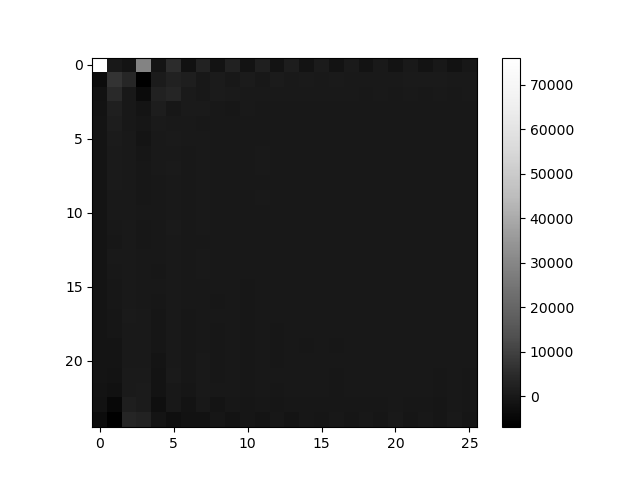
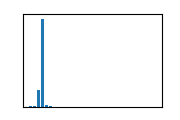

In [ ]:
fft_image = cle.fft(image, None)
fft_image

array([[ 40.00001 ,  32.000015,  24.000011,  24.000015,  16.000015,
         24.      ,  24.000023,  32.000015,  31.99997 ,  32.000008,
         24.000004,  24.000013,  24.000025,  23.999985,  24.00005 ,
         31.999989,  40.000015,  79.99999 , 112.000015, 151.99997 ,
        184.      , 207.99997 , 231.99995 , 232.      , 223.99994 ],
       [ 56.000008,  40.000008,  24.000008,  24.000023,  24.00003 ,
         32.000008,  32.      ,  32.000015,  32.00003 ,  32.00004 ,
         24.000004,  24.000038,  24.000034,  32.000076,  32.00001 ,
         48.00002 ,  56.000015,  95.999985, 127.999985, 159.99997 ,
        192.      , 215.99997 , 231.99998 , 231.99994 , 231.99997 ],
       [ 63.999985,  48.000023,  24.000008,  32.      ,  32.000008,
         31.999992,  32.      ,  32.000015,  32.      ,  31.999992,
         24.00002 ,  24.000021,  24.00003 ,  32.00001 ,  32.000046,
         56.00001 ,  72.00001 , 103.999985, 135.99998 , 167.99998 ,
        199.99997 , 215.99997 , 223.99995 , 231.99997 , 231.99997 ],
       [ 39.999985,  39.999992,  31.999992,  39.99999 ,  40.00002 ,
         40.      ,  39.999977,  32.000023,  32.00003 ,  24.00003 ,
         24.00001 ,  24.000034,  24.000046,  32.000088,  40.000008,
         72.00001 ,  96.      , 127.999985, 159.99997 , 183.99997 ,
        207.99998 , 215.99997 , 223.99994 , 223.99991 , 223.99995 ],
       [ 16.000023,  24.000038,  32.000008,  40.000023,  47.999992,
         48.      ,  40.000008,  31.999977,  23.99997 ,  24.000015,
         16.000004,  24.000011,  24.000042,  40.      ,  48.00007 ,
         80.000015, 111.999985, 144.00002 , 176.00002 , 200.      ,
        216.      , 215.99997 , 215.99997 , 216.00002 , 215.99995 ],
       [ 24.000004,  32.      ,  40.000008,  48.      ,  56.      ,
         47.999985,  39.999992,  32.000015,  24.000015,  24.00003 ,
         15.999989,  24.000027,  32.000015,  56.000046,  80.      ,
        112.      , 143.99998 , 175.99997 , 199.99995 , 207.99997 ,
        216.00002 , 215.99997 , 215.99998 , 215.99995 , 207.99998 ],
       [ 31.999996,  40.000023,  48.      ,  56.      ,  56.      ,
         48.000015,  32.000015,  24.000015,  16.      ,  16.000023,
         16.000015,  32.000015,  40.00004 ,  80.      , 112.00003 ,
        143.99998 , 175.99995 , 199.99997 , 215.99997 , 215.99997 ,
        215.99998 , 215.99997 , 215.99997 , 208.      , 199.99997 ],
       [ 40.      ,  47.999996,  47.99999 ,  56.00001 ,  56.000023,
         40.000008,  32.000008,  24.00003 ,  16.000069,  24.00003 ,
         24.000023,  48.000023,  64.00003 , 104.00003 , 144.      ,
        167.99997 , 191.99997 , 207.99994 , 215.99994 , 215.99997 ,
        215.99997 , 216.      , 207.99995 , 207.99994 , 199.99998 ],
       [ 48.000004,  47.999996,  47.99999 ,  47.99997 ,  48.      ,
         39.999992,  24.000015,  24.00003 ,  16.      ,  24.000046,
         32.000023,  64.00001 ,  88.000015, 136.      , 175.99997 ,
        192.      , 199.99997 , 207.99995 , 216.      , 215.99994 ,
        208.      , 207.99997 , 199.99995 , 199.99998 , 191.99994 ],
       [ 48.00001 ,  48.000004,  48.000034,  48.00003 ,  40.00003 ,
         39.999985,  32.      ,  32.000015,  24.000046,  40.000008,
         48.      ,  80.00003 , 112.00001 , 152.00002 , 183.99997 ,
        191.99998 , 199.99997 , 207.99997 , 215.99995 , 215.99997 ,
        215.99998 , 207.99997 , 207.99998 , 199.99994 , 200.      ],
       [ 47.999985,  48.000023,  40.000015,  40.      ,  32.00004 ,
         32.000008,  32.000015,  32.000023,  32.      ,  48.000015,
         64.000015, 104.000015, 136.      , 160.00002 , 183.99998 ,
        191.99998 , 199.99998 , 207.99997 , 216.00002 , 215.99998 ,
        215.99997 , 215.99998 , 207.99997 , 207.99998 , 199.99997 ],
       [ 40.000015,  40.00002 ,  32.000046,  32.00006 ,  32.000053,
         32.00004 ,  32.000023,  40.00006 ,  48.000084,  64.00004 ,
         88.000015, 112.000015, 143.99998 , 159.99998 , 175.99997 ,
        191.99995 , 199.99995 , 207.99995 , 2
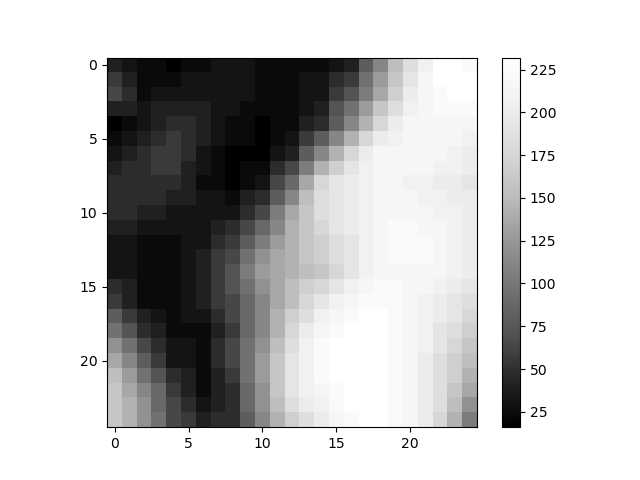
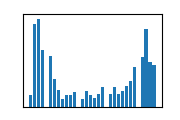

In [ ]:
new_image = cle.create_like(image)
cle.ifft(fft_image, new_image)
new_image

## Smooth shape and FFT speed

FFT requires an image size at the power of 2 to compute. The library vkFFT that we are relying on can manage non-smooth shape but at a speed cost. Hence, it is advise to `pad` your input image before the `fft` to make it optimised.

(25, 37) vs [25, 40]


array([[  0.,   0.,  40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,
         32.,  24.,  24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152.,
        184., 208., 232., 232., 224., 216., 208., 208., 208., 208., 200.,
        200., 200., 184., 160., 128.,  88.,   0.],
       [  0.,   0.,  56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,
         32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160.,
        192., 216., 232., 232., 232., 224., 208., 208., 208., 200., 200.,
        192., 184., 160., 144., 112.,  80.,   0.],
       [  0.,   0.,  64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,
         32.,  24.,  24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168.,
        200., 216., 224., 232., 232., 224., 208., 208., 200., 200., 192.,
        176., 160., 144., 120.,  96.,  72.,   0.],
       [  0.,   0.,  40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,
         24.,  24.,  24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184.,
        208., 216., 224., 224., 224., 216., 208., 200., 192., 184., 168.,
        152., 136., 120.,  96.,  80.,  64.,   0.],
       [  0.,   0.,  16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,
         24.,  16.,  24.,  24.,  40.,  48.,  80., 112., 144., 176., 200.,
        216., 216., 216., 216., 216., 208., 200., 192., 176., 160., 144.,
        128., 104.,  88.,  72.,  64.,  48.,   0.],
       [  0.,   0.,  24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,
         24.,  16.,  24.,  32.,  56.,  80., 112., 144., 176., 200., 208.,
        216., 216., 216., 216., 208., 200., 192., 176., 160., 144., 128.,
        112.,  88.,  80.,  64.,  56.,  40.,   0.],
       [  0.,   0.,  32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,
         16.,  16.,  32.,  40.,  80., 112., 144., 176., 200., 216., 216.,
        216., 216., 216., 208., 200., 192., 184., 168., 144., 128., 104.,
         88.,  72.,  64.,  48.,  40.,  32.,   0.],
       [  0.,   0.,  40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,
         24.,  24.,  48.,  64., 104., 144., 168., 192., 208., 216., 216.,
        216., 216., 208., 208., 200., 192., 184., 160., 144., 120.,  96.,
         80.,  56.,  48.,  40.,  40.,  32.,   0.],
       [  0.,   0.,  48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,
         24.,  32.,  64.,  88., 136., 176., 192., 200., 208., 216., 216.,
        208., 208., 200., 200., 192., 184., 176., 160., 136., 112.,  80.,
         64.,  40.,  40.,  32.,  32.,  32.,   0.],
       [  0.,   0.,  48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,
         40.,  48.,  80., 112., 152., 184., 192., 200., 208., 216., 216.,
        216., 208., 208., 200., 200., 192., 184., 152., 128., 104.,  72.,
         56.,  32.,  32.,  32.,  32.,  32.,   0.],
       [  0.,   0.,  48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,
         48.,  64., 104., 136., 160., 184., 192., 200., 208., 216., 216.,
        216., 216., 208., 208., 200., 192., 184., 152., 112.,  88.,  64.,
         48.,  24.,  24.,  24.,  24.,  24.,   0.],
       [  0.,   0.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,
         64.,  88., 112., 144., 160., 176., 192., 200., 208., 216., 224.,
        224., 216., 216., 208., 200., 192., 176., 144., 112.,  88.,  64.,
         48.,  24.,  24.,  24.,  32.,  32.,   0.],
       [  0.,   0.,  32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,
         80., 104., 128., 144., 160., 168., 184., 192., 208., 216., 224.,
        224., 224., 216., 208., 200., 184., 168., 136., 104.,  80.,  56.,
         40.,  24.,  24.,  24.,  32.,  32.,   0.],
       [  0.,   0.,  32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,
         96., 120., 136., 144., 160., 168., 184., 192., 208., 216., 224.,
        224., 224., 216., 208., 200., 184., 168., 128.,  96.,  72.,  48.,
         40.,  24.,  32.,  32.,  32.,  32.,   0.],
       [  0.,   0.,  32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,
        104., 128., 136., 144., 152., 160., 176., 192., 208., 216., 216.,
        216., 216., 216., 208.
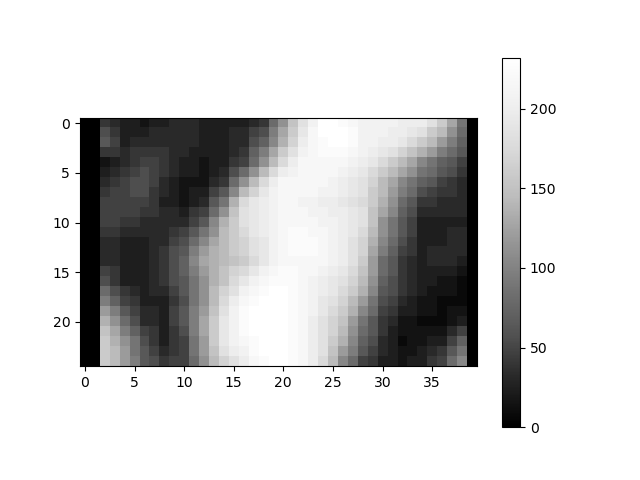
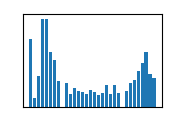

In [ ]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:37])
smooth_shape = cle.fft_smooth_shape(image.shape)
print(image.shape , "vs", smooth_shape)
padded_image = cle.pad(image, size_x=smooth_shape[-1], size_y=smooth_shape[0], center=True)
padded_image

Once padded, we can safely apply an fft and reverse

array([[ 1.0211200e+05,  0.0000000e+00, -4.3629156e+04, ...,
        -4.6997456e+01,  6.3999976e+02,  0.0000000e+00],
       [ 4.1096960e+02,  9.2473547e+02,  1.7262707e+04, ...,
         1.8984912e+02,  3.7461124e+02,  2.1138744e+02],
       [ 8.0171680e+02,  7.2834918e+02,  8.8419248e+03, ...,
         1.3706717e+02,  6.9371185e+01,  2.5331352e+02],
       ...,
       [ 8.8394760e+01,  1.6472983e+02, -2.6965312e+03, ...,
        -7.0145905e+01, -3.6824905e+01, -3.4964626e+01],
       [ 8.0171686e+02, -7.2834924e+02, -4.3446880e+03, ...,
        -2.6196191e+02,  6.9371170e+01, -2.5331351e+02],
       [ 4.1096960e+02, -9.2473547e+02, -4.2666377e+03, ...,
        -2.5393317e+02,  3.7461121e+02, -2.1138748e+02]], dtype=float32, mtype=buffer)
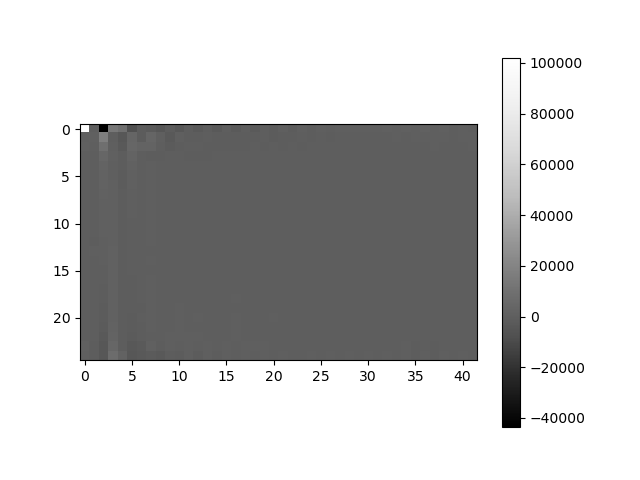
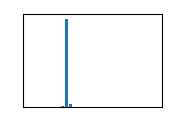

In [ ]:
fft_image = cle.fft(padded_image, None)
fft_image

array([[-3.81469727e-06,  1.52587891e-05,  4.00000420e+01,
         3.19999790e+01,  2.40000076e+01,  2.40000267e+01,
         1.59999981e+01,  2.40000381e+01,  2.40000000e+01,
         3.20000076e+01,  3.20000153e+01,  3.20000153e+01,
         2.40000534e+01,  2.40000076e+01,  2.40000381e+01,
         2.40000000e+01,  2.40000076e+01,  3.20000229e+01,
         3.99999924e+01,  8.00000534e+01,  1.12000000e+02,
         1.52000000e+02,  1.84000000e+02,  2.07999985e+02,
         2.32000000e+02,  2.31999969e+02,  2.23999939e+02,
         2.15999969e+02,  2.08000000e+02,  2.08000000e+02,
         2.08000000e+02,  2.07999985e+02,  1.99999969e+02,
         2.00000000e+02,  2.00000015e+02,  1.83999985e+02,
         1.60000000e+02,  1.27999992e+02,  8.79999619e+01,
         5.72204590e-06],
       [-1.14440918e-05,  1.52587891e-05,  5.60000114e+01,
         4.00000114e+01,  2.40000153e+01,  2.40000019e+01,
         2.40000191e+01,  3.20000191e+01,  3.20000153e+01,
         3.20000305e+01,  3.20000381e+01,  3.20000191e+01,
         2.40000153e+01,  2.40000496e+01,  2.40000839e+01,
         3.19999962e+01,  3.20000153e+01,  4.80000153e+01,
         5.60000305e+01,  9.60000153e+01,  1.27999992e+02,
         1.60000000e+02,  1.91999985e+02,  2.15999939e+02,
         2.31999924e+02,  2.31999954e+02,  2.31999939e+02,
         2.23999954e+02,  2.07999908e+02,  2.07999939e+02,
         2.07999924e+02,  1.99999969e+02,  1.99999954e+02,
         1.91999939e+02,  1.83999969e+02,  1.59999969e+02,
         1.43999954e+02,  1.11999969e+02,  7.99999542e+01,
        -1.52587891e-05],
       [ 3.81469727e-06,  5.72204590e-06,  6.40000229e+01,
         4.80000038e+01,  2.40000153e+01,  3.20000305e+01,
         3.20000229e+01,  3.20000458e+01,  3.20000153e+01,
         3.20000305e+01,  3.20000114e+01,  3.20000381e+01,
         2.40000458e+01,  2.40000191e+01,  2.40000515e+01,
         3.20000420e+01,  3.20000305e+01,  5.60000534e+01,
         7.20000153e+01,  1.04000023e+02,  1.36000000e+02,
         1.68000000e+02,  1.99999985e+02,  2.15999954e+02,
         2.23999969e+02,  2.31999969e+02,  2.31999954e+02,
         2.23999939e+02,  2.07999969e+02,  2.07999969e+02,
         1.99999985e+02,  1.99999954e+02,  1.91999969e+02,
         1.75999954e+02,  1.60000000e+02,  1.43999969e+02,
         1.19999969e+02,  9.59999695e+01,  7.19999542e+01,
         4.86373901e-05],
       [-3.81469727e-06,  3.43322754e-05,  4.00000153e+01,
         4.00000153e+01,  3.20000191e+01,  4.00000000e+01,
         4.00000343e+01,  4.00000229e+01,  4.00000229e+01,
         3.20000458e+01,  3.20000114e+01,  2.40000343e+01,
         2.40000229e+01,  2.40000458e+01,  2.40000610e+01,
         3.20000305e+01,  4.00000305e+01,  7.20000153e+01,
         9.60000153e+01,  1.28000015e+02,  1.59999985e+02,
         1.83999985e+02,  2.07999969e+02,  2.15999969e+02,
         2.23999969e+02,  2.23999954e+02,  2.23999954e+02,
         2.15999954e+02,  2.07999924e+02,  1.99999954e+02,
         1.91999939e+02,  1.84000000e+02,  1.67999939e+02,
         1.51999954e+02,  1.35999969e+02,  1.19999969e+02,
         9.60000076e+01,  7.99999771e+01,  6.39999771e+01,
         1.14440918e-05],
       [-5.72204590e-06,  5.72204590e-06,  1.60000401e+01,
         2.39999962e+01,  3.20000114e+01,  4.00000038e+01,
         4.80000191e+01,  4.80000381e+01,  4.00000191e+01,
         3.20000229e+01,  2.40000153e+01,  2.40000305e+01,
         1.60000515e+01,  2.40000210e+01,  2.40000610e+01,
         4.00000305e+01,  4.80000153e+01,  8.00000534e+01,
         1.12000008e+02,  1.44000015e+02,  1.76000000e+02,
         1.99999985e+02,  2.15999985e+02,  2.15999985e+02,
         2.15999985e+02,  2.16000000e+02,  2.15999969e+02,
         2.07999954e+02,  1.99999969e+02,  1.91999985e+02,
         1.75999985e+02,  1.59999985e+02,  1.43999969e+02,
         1.27999962e+02,  1.04000000e+02,  8.79999695e+01,
         7.20000000e+01,  6.39999847e+01,  4.79999466e+01,
         5.72204590e-06],
       [-7.62939453e-06, -5.7220459
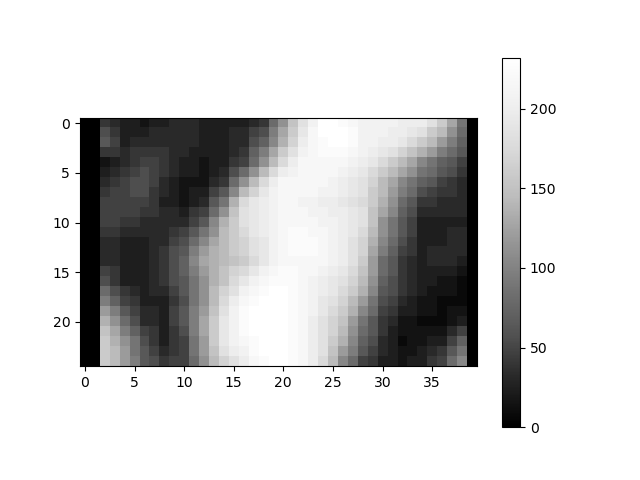
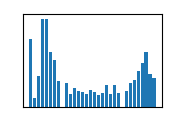

In [ ]:
new_image = cle.create_like(padded_image)
cle.ifft(fft_image, new_image)
new_image

As we padded the image, the output is no more of the same size of the original data so we can unpad it

array([[ 40.000042 ,  31.999979 ,  24.000008 ,  24.000027 ,  15.999998 ,
         24.000038 ,  24.       ,  32.000008 ,  32.000015 ,  32.000015 ,
         24.000053 ,  24.000008 ,  24.000038 ,  24.       ,  24.000008 ,
         32.000023 ,  39.999992 ,  80.00005  , 112.       , 152.       ,
        184.       , 207.99998  , 232.       , 231.99997  , 223.99994  ,
        215.99997  , 208.       , 208.       , 208.       , 207.99998  ,
        199.99997  , 200.       , 200.00002  , 183.99998  , 160.       ,
        127.99999  ,  87.99996  ],
       [ 56.00001  ,  40.00001  ,  24.000015 ,  24.000002 ,  24.00002  ,
         32.00002  ,  32.000015 ,  32.00003  ,  32.00004  ,  32.00002  ,
         24.000015 ,  24.00005  ,  24.000084 ,  31.999996 ,  32.000015 ,
         48.000015 ,  56.00003  ,  96.000015 , 127.99999  , 160.       ,
        191.99998  , 215.99994  , 231.99992  , 231.99995  , 231.99994  ,
        223.99995  , 207.99991  , 207.99994  , 207.99992  , 199.99997  ,
        199.99995  , 191.99994  , 183.99997  , 159.99997  , 143.99995  ,
        111.99997  ,  79.999954 ],
       [ 64.00002  ,  48.000004 ,  24.000015 ,  32.00003  ,  32.000023 ,
         32.000046 ,  32.000015 ,  32.00003  ,  32.00001  ,  32.00004  ,
         24.000046 ,  24.00002  ,  24.000051 ,  32.000042 ,  32.00003  ,
         56.000053 ,  72.000015 , 104.00002  , 136.       , 168.       ,
        199.99998  , 215.99995  , 223.99997  , 231.99997  , 231.99995  ,
        223.99994  , 207.99997  , 207.99997  , 199.99998  , 199.99995  ,
        191.99997  , 175.99995  , 160.       , 143.99997  , 119.99997  ,
         95.99997  ,  71.999954 ],
       [ 40.000015 ,  40.000015 ,  32.00002  ,  40.       ,  40.000034 ,
         40.000023 ,  40.000023 ,  32.000046 ,  32.00001  ,  24.000034 ,
         24.000023 ,  24.000046 ,  24.000061 ,  32.00003  ,  40.00003  ,
         72.000015 ,  96.000015 , 128.00002  , 159.99998  , 183.99998  ,
        207.99997  , 215.99997  , 223.99997  , 223.99995  , 223.99995  ,
        215.99995  , 207.99992  , 199.99995  , 191.99994  , 184.       ,
        167.99994  , 151.99995  , 135.99997  , 119.99997  ,  96.00001  ,
         79.99998  ,  63.999977 ],
       [ 16.00004  ,  23.999996 ,  32.00001  ,  40.000004 ,  48.00002  ,
         48.00004  ,  40.00002  ,  32.000023 ,  24.000015 ,  24.00003  ,
         16.000051 ,  24.000021 ,  24.000061 ,  40.00003  ,  48.000015 ,
         80.00005  , 112.00001  , 144.00002  , 176.       , 199.99998  ,
        215.99998  , 215.99998  , 215.99998  , 216.       , 215.99997  ,
        207.99995  , 199.99997  , 191.99998  , 175.99998  , 159.99998  ,
        143.99997  , 127.99996  , 104.       ,  87.99997  ,  72.       ,
         63.999985 ,  47.999947 ],
       [ 24.000004 ,  32.000015 ,  40.000023 ,  47.99999  ,  56.00003  ,
         48.000008 ,  40.00004  ,  32.000027 ,  24.000002 ,  24.000027 ,
         15.999996 ,  24.00002  ,  32.000046 ,  55.999985 ,  80.00002  ,
        111.99997  , 143.99997  , 175.99998  , 199.99997  , 208.00002  ,
        215.99997  , 215.99997  , 215.99997  , 215.99997  , 207.99997  ,
        199.99998  , 191.99994  , 175.99998  , 159.99997  , 144.       ,
        127.99999  , 111.999985 ,  87.99999  ,  80.       ,  63.99999  ,
         55.999966 ,  39.999985 ],
       [ 32.00001  ,  40.000004 ,  48.000004 ,  56.       ,  56.000023 ,
         48.000027 ,  32.       ,  24.000038 ,  16.00001  ,  16.000036 ,
         16.000021 ,  32.000008 ,  40.00006  ,  79.999985 , 111.999985 ,
        144.       , 175.99997  , 199.99998  , 215.99997  , 215.99997  ,
        215.99997  , 215.99997  , 215.99998  , 208.       , 199.99997  ,
        191.99998  , 183.99997  , 167.99997  , 144.       , 128.       ,
        104.000015 ,  88.00001  ,  72.00002  ,  64.00001  ,  48.00004  ,
         40.000008 ,  31.99997  ],
       [ 40.000023 ,  48.00003  ,  48.00007  ,  56.000008 ,  56.000023 ,
         40.000004 ,  32.000008 ,  24.000048 ,  15.999996 ,  24.000017 ,
         24.000032 ,  48.000046 
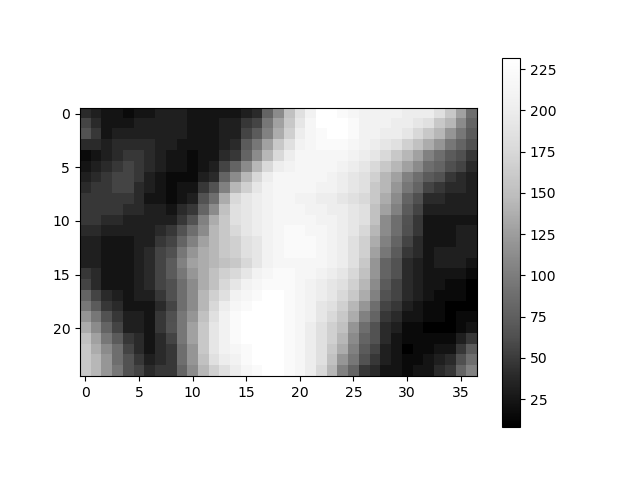
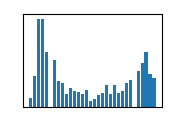

In [ ]:
cle.unpad(new_image, size_x=image.shape[1], size_y=image.shape[0], center=True)